# Clase 17, efectos combinados (fijos + aleatorios)

- En las notas ``07.pdf`` pág. 3 veremos el ejemplo Dental Fillings Experiment.
- Queremos ver el rendimiento del producto en función del dentista, pero el dentista en si no te interesa. 
- Tenemos 3 métodos (efecto fijo) y los dentistas (efecto aleatorio)
- Son cruzados, no anidados.

In [3]:
datos = read.csv("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/03_efectos_aleatorios_y_mixtos/datos/datos-dentista.txt", sep=" ")
head(datos)
#names(datos)
attach(datos)
str(datos)

fDent = as.factor(Dentista)
fMetodo = as.factor(Metodo)
fAleacion = as.factor(Aleacion)

Dentista,Metodo,Aleacion,Respuesta
1,1,1,792
1,2,1,772
1,3,1,782
2,1,1,803
2,2,1,752
2,3,1,715


The following objects are masked from datos (pos = 3):

    Aleacion, Dentista, Metodo, Respuesta

The following objects are masked from datos (pos = 4):

    Aleacion, Dentista, Metodo, Respuesta



'data.frame':	120 obs. of  4 variables:
 $ Dentista : int  1 1 1 2 2 2 3 3 3 4 ...
 $ Metodo   : int  1 2 3 1 2 3 1 2 3 1 ...
 $ Aleacion : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Respuesta: int  792 772 782 803 752 715 715 792 762 673 ...


Hacemos un grafico de interacción:

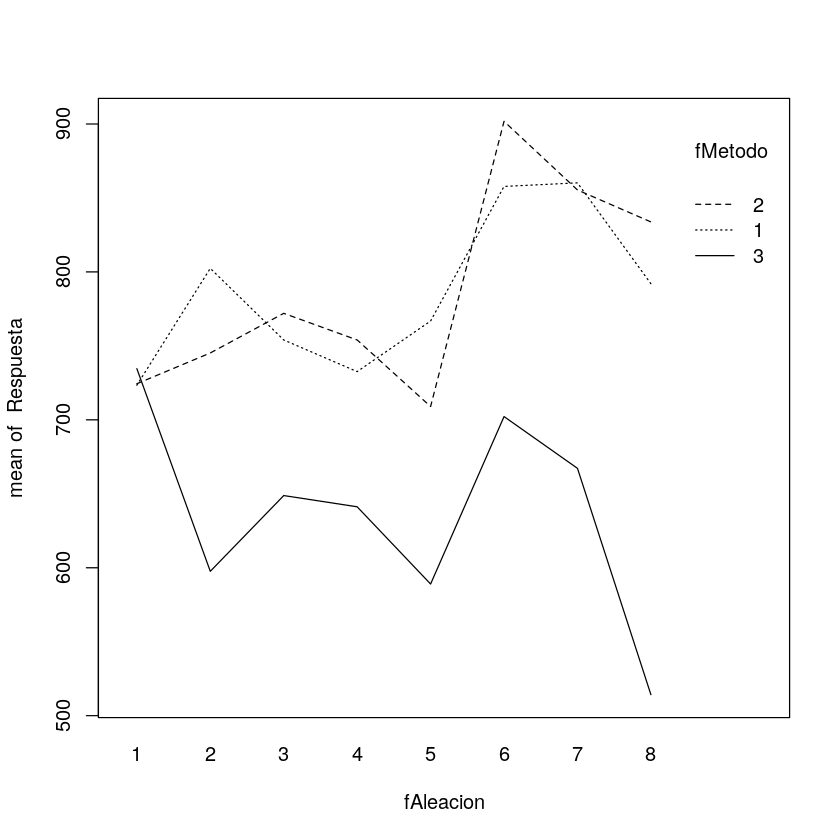

In [4]:
interaction.plot(fAleacion, fMetodo, Respuesta)

In [5]:
# mixto
library(lme4)

m2 = lmer(Respuesta ~ fAleacion*fMetodo + (1|fDent) + (1|fDent:fMetodo) + (1|fDent:fAleacion), REML=TRUE)

Loading required package: Matrix


In [6]:
# aca nos dice que es cada cosa
# 1ro el dentista con aleacion .sig1 que veremos luego
# 2do dentista con metodo .sig2 que veremos luego
summary(m2)

# 1: fDent:fAleacion
# 2: fDent:fMetodo
# 3: fDent       


Correlation matrix not shown by default, as p = 24 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Linear mixed model fit by REML ['lmerMod']
Formula: Respuesta ~ fAleacion * fMetodo + (1 | fDent) + (1 | fDent:fMetodo) +  
    (1 | fDent:fAleacion)

REML criterion at convergence: 1203.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.86246 -0.63713  0.03148  0.41127  2.35309 

Random effects:
 Groups          Name        Variance Std.Dev.
 fDent:fAleacion (Intercept)    0.0    0.00   
 fDent:fMetodo   (Intercept) 2974.8   54.54   
 fDent           (Intercept)  894.3   29.91   
 Residual                    9131.8   95.56   
Number of obs: 120, groups:  fDent:fAleacion, 40; fDent:fMetodo, 15; fDent, 5

Fixed effects:
                    Estimate Std. Error t value
(Intercept)           723.40      50.99  14.187
fAleacion2             79.00      60.44   1.307
fAleacion3             30.60      60.44   0.506
fAleacion4              9.20      60.44   0.152
fAleacion5             43.40      60.44   0.718
fAleacion6            134.40      60.44   2.224
fAleacion7       

In [7]:
# le digo que me haga un intervalo de confianza para las varianzas
# nos interesa ver los sigma .sig1 y .sig3 no son significativos porque contienen el 0
# .sig1 
# .sigma corresponde a los residuos, a la varianza del error
confint(m2)

Computing profile confidence intervals ...
Warning message in nextpar(mat, cc, i, delta, lowcut, upcut):
“Last two rows have identical or NA .zeta values: using minstep”Warning message in nextpar(mat, cc, i, delta, lowcut, upcut):
“Last two rows have identical or NA .zeta values: using minstep”Warning message in nextpar(mat, cc, i, delta, lowcut, upcut):
“Last two rows have identical or NA .zeta values: using minstep”Warning message in nextpar(mat, cc, i, delta, lowcut, upcut):
“Last two rows have identical or NA .zeta values: using minstep”Warning message in nextpar(mat, cc, i, delta, lowcut, upcut):
“Last two rows have identical or NA .zeta values: using minstep”Warning message in nextpar(mat, cc, i, delta, lowcut, upcut):
“Last two rows have identical or NA .zeta values: using minstep”Warning message in FUN(X[[i]], ...):
“non-monotonic profile for .sig01”Warning message in confint.thpr(pp, level = level, zeta = zeta):
“bad spline fit for .sig01: falling back to linear interpolation”

,2.5 %,97.5 %
.sig01,0.00000,32.35154
.sig02,24.22474,87.45062
.sig03,0.00000,86.81780
.sigma,75.02510,98.47673
(Intercept),632.61410,814.18693
fAleacion2,-27.92659,185.92658
fAleacion3,-76.32659,137.52658
fAleacion4,-97.72659,116.12658
fAleacion5,-63.52659,150.32658
fAleacion6,27.47341,241.32658


In [8]:
# ahora hacemos el modelo sacando los que no son significativos 
# false uso para el test, el true es solo cuando quiero un IC para la varianza
m1 = lmer(Respuesta~fAleacion*fMetodo+(1|fDent)+(1|fDent:fMetodo)+(1|fDent:fAleacion), REML=FALSE)
m0 = lmer(Respuesta~fAleacion*fMetodo+(1|fDent:fMetodo), REML=FALSE) # este tiene un termino aleatorio
anova(m0, m1)
# como el pvalor es grande uso el modelo mas chico

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m0,26,1482.299,1554.774,-715.1494,1430.299,NA,NA,NA
m1,28,1485.859,1563.909,-714.9295,1429.859,0.4397946,2,0.8026012


In [9]:
# como vimos eso entonces
m0b = lm(Respuesta~fAleacion*fMetodo) # uso lm porque no tengo termino aleatorio, es todo fijo
anova(m0, m0b)
# nos da un pvalor chico (E-6), asi que tengo que usar el modelo mas grande

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m0b,25,1500.501,1570.188,-725.2506,1450.501,NA,NA,NA
m0,26,1482.299,1554.774,-715.1494,1430.299,20.20236,1,6.966681e-06


In [10]:
# resultados con efectos aleatorios, nos quedamos con el modelo m0, que lo renombro a m1
m1 = lmer(Respuesta ~ fAleacion * fMetodo + (1|fDent:fMetodo), REML=FALSE) # este tiene un termino aleatorio interaccion entre dentista y metodo
# ahora no tenemos mas nada que hacer con los aleatorios, asi que vamos a laburar con los fijos
# teneoms 2 fijos, asi que vamos a analizaarlos sin sacar el aleatorio que es significativo
m0 = lmer(Respuesta ~ fAleacion + fMetodo + (1|fDent:fMetodo), REML=FALSE)
anova(m0, m1)
# nos dio un pvalor de 0.03 o sea que la interaccion es significativa entre los factores fijos

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m0,12,1479.682,1513.132,-727.8411,1455.682,NA,NA,NA
m1,26,1482.299,1554.774,-715.1494,1430.299,25.38347,14,0.03096514


In [11]:
# hagamos un paréntesis...
# que nos hubiese dado si NO consideramos efectos aleatorios, la variabilidad del dentista, veamos:
mfijos = aov(Respuesta ~ fAleacion*fMetodo)
summary(mfijos)
# hubiese concluído que la interaccion no me da significativa (pvalor 0.3244), 
# eso me cambia todo el análisis, de ahí la importancia


                  Df  Sum Sq Mean Sq F value   Pr(>F)    
fAleacion          7  220338   31477   2.421   0.0251 *  
fMetodo            2  597615  298808  22.984 6.98e-09 ***
fAleacion:fMetodo 14  209773   14984   1.153   0.3244    
Residuals         96 1248089   13001                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



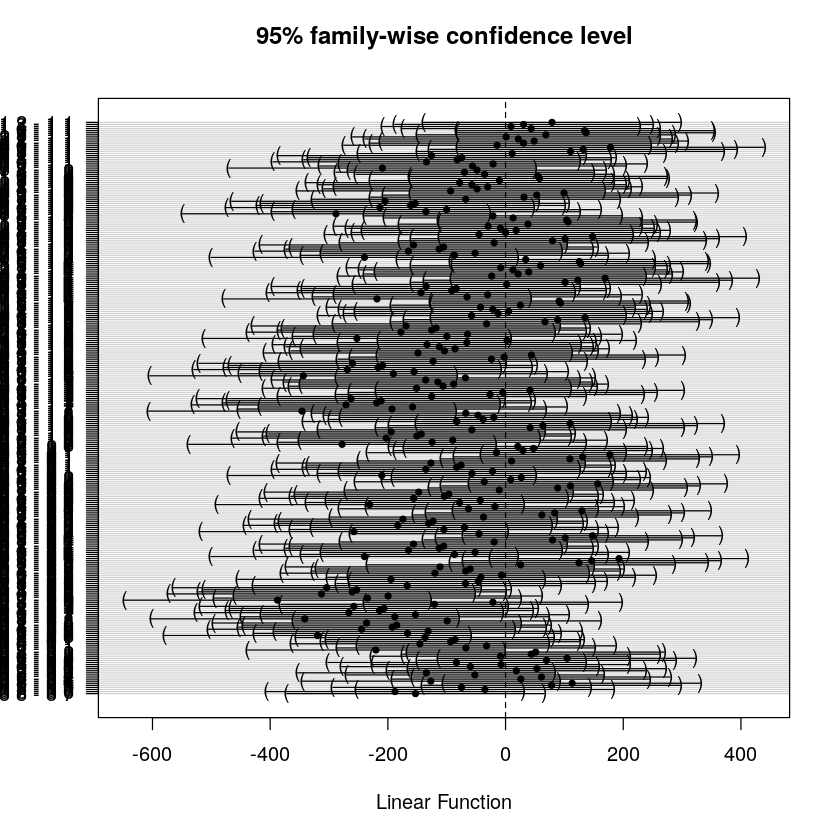

In [12]:
# volviendo
library(multcomp)
fab = factor(paste(fMetodo, fAleacion))
modelo = lmer(Respuesta~fab + (1|fDent:fMetodo), REML=TRUE)
m = glht(modelo, linfct=mcp(fab="Tukey"))
plot(m)

In [16]:
# con esto vemos los IC para saber si son equivalentes o no.
confint(m)


	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = Respuesta ~ fab + (1 | fDent:fMetodo), REML = TRUE)

Quantile = 3.6064
95% family-wise confidence level
 

Linear Hypotheses:
               Estimate   lwr        upr       
1 2 - 1 1 == 0  7.900e+01 -1.390e+02  2.970e+02
1 3 - 1 1 == 0  3.060e+01 -1.874e+02  2.486e+02
1 4 - 1 1 == 0  9.200e+00 -2.088e+02  2.272e+02
1 5 - 1 1 == 0  4.340e+01 -1.746e+02  2.614e+02
1 6 - 1 1 == 0  1.344e+02 -8.356e+01  3.524e+02
1 7 - 1 1 == 0  1.368e+02 -8.116e+01  3.548e+02
1 8 - 1 1 == 0  6.860e+01 -1.494e+02  2.866e+02
2 1 - 1 1 == 0  1.000e+00 -2.591e+02  2.611e+02
2 2 - 1 1 == 0  2.180e+01 -2.383e+02  2.819e+02
2 3 - 1 1 == 0  4.860e+01 -2.115e+02  3.087e+02
2 4 - 1 1 == 0  3.060e+01 -2.295e+02  2.907e+02
2 5 - 1 1 == 0 -1.440e+01 -2.745e+02  2.457e+02
2 6 - 1 1 == 0  1.784e+02 -8.167e+01  4.385e+02
2 7 - 1 1 == 0  1.320e+02 -1.281e+02  3.921e+02
2 8 - 1 1 == 0  1.104e+02 -1.497e+02  3.705e+02

**Resumiendo el uso de MODELO DE EFECTOS MIXTOS** en ``R``

```
library(lme4)
modelo = lmer(Y~FijoA*FijoB + (1|Aleatorio) + (1|Aleatorio:FijoA) + (1|Aleatorio:FijoB), REML=XYZ)
```
Donde ``XYZ`` es ``TRUE`` cuando queremos haer el IC para la varianza del termino aleatorio y ``FALSE`` cuando queremos testear.

Lo anterior era cuando teniamos efectos cruzados, pero si tenemos anidados, que son por ejemplos distintas máquinas (1, 2, 3) y saco distintos lotes de producción de cada una por ej mañana, siesta y tarde (B1, B2, B3) y no tiene sentido cruzarlos.

para eso en R vez de usar ``(1|Aleatorio:FijoA)``  debo decirselo usando ``%in%`` del siguiente modo ``(1|Aleatorio%in%FijoA)`` , sería:

Si no tengo efectos fijos entonces me queda: 

``modelo = lmer(Y~1 + (1|Maquina) + (1|Batch%in%Maquina))``

In [17]:
summary(m)

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warn


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = Respuesta ~ fab + (1 | fDent:fMetodo), REML = TRUE)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
1 2 - 1 1 == 0  7.900e+01  6.044e+01   1.307   0.9998    
1 3 - 1 1 == 0  3.060e+01  6.044e+01   0.506   1.0000    
1 4 - 1 1 == 0  9.200e+00  6.044e+01   0.152   1.0000    
1 5 - 1 1 == 0  4.340e+01  6.044e+01   0.718   1.0000    
1 6 - 1 1 == 0  1.344e+02  6.044e+01   2.224   0.8437    
1 7 - 1 1 == 0  1.368e+02  6.044e+01   2.263   0.8208    
1 8 - 1 1 == 0  6.860e+01  6.044e+01   1.135   1.0000    
2 1 - 1 1 == 0  1.000e+00  7.211e+01   0.014   1.0000    
2 2 - 1 1 == 0  2.180e+01  7.211e+01   0.302   1.0000    
2 3 - 1 1 == 0  4.860e+01  7.211e+01   0.674   1.0000    
2 4 - 1 1 == 0  3.060e+01  7.211e+01   0.424   1.0000    
2 5 - 1 1 == 0 -1.440e+01  7.211e+01  -0.200   1.0000    
2 6 - 1 1 == 0  1.784e+02  7.211e+01   2.474   0.672